In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd 
from sklearn.utils import shuffle#样本数据打乱
from sklearn.preprocessing import scale

print(tf.__version__)

2.1.0


In [2]:
#读取数据文件
df=pd.read_csv("C:/Users\ASUS/.keras/datasets/boston_house_prices.csv",header=0)

In [3]:
#显示数据摘要描述信息
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [4]:
#df.head(3)#显示前3条数据

In [5]:
#df.tail(3)#显示后3条数据

In [6]:
ds=df.values

In [7]:
print(df.shape)#查看数据的形状

(506, 13)


In [8]:

#x_data为前12列特征数据(归一化后的数据)

x_data = ds[:,:12]

#y_data为最后一列标签数量

y_data = ds[:,12]


#对特征数据

for i in range(12):
    x_data[:,i] = (x_data[:,i]-x_data[:,i].min())/(x_data[:,i].max()-x_data[:,i].min())

print('x_data shape=',x_data.shape)
print('y_data shape=',y_data.shape)

x_data shape= (506, 12)
y_data shape= (506,)


划分数据集：训练集、验证机、测试集

In [9]:
train_num=300#训练集的数目
valid_num=100
test_num=len(x_data)-train_num-valid_num#测试集

#训练集划分
x_train=x_data[:train_num]
y_train=y_data[:train_num]

#验证集划分
x_valid=x_data[train_num:train_num+valid_num]
y_valid=y_data[train_num:train_num+valid_num]

#测试集划分
x_test=x_data[train_num+valid_num:train_num+valid_num+test_num]
y_test=y_data[train_num+valid_num:train_num+valid_num+test_num]


转换为tf.float32数据类型，后面求损失时要和变量w执行tf.matmul操作

In [10]:
x_train = tf.cast(scale(x_train), dtype=tf.float32)
x_valid = tf.cast(scale(x_valid), dtype=tf.float32)
x_test = tf.cast(scale(x_test), dtype=tf.float32)


构建模型

In [11]:
def model(x, w, b):
    return tf.matmul(x,w)+ b

创建变量

In [12]:
w=tf.Variable(tf.random.normal([12,1],mean=0.0, stddev = 1.0, dtype=tf.float32))
b=tf.Variable(tf.zeros(1), dtype = tf.float32)

In [13]:
print(w)
print(b)

<tf.Variable 'Variable:0' shape=(12, 1) dtype=float32, numpy=
array([[-0.23524837],
       [-0.92870116],
       [ 1.466683  ],
       [-0.3337184 ],
       [-1.5432787 ],
       [-1.101277  ],
       [-0.54214865],
       [ 0.19554488],
       [ 0.2885435 ],
       [-0.4805279 ],
       [ 0.00835432],
       [-0.38342583]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


训练模型

In [14]:
#设置训练参数
training_epochs=50#迭代次数
learning_rate=0.001#学习率
batch_size=10#批量训练一次的样本数

In [15]:
#定义均方差损失函数
def loss(x,y,w,b):
    err = model(x,w,b)-y  #计算模型预测值和标签值得差距
    squared_err=tf.square(err)#求平方，得出方差
    return tf.reduce_mean(squared_err)#求均值，得出均方差

In [16]:
#定义梯度计算函数
def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        loss_=loss(x,y,w,b)
    return tape.gradient(loss_,[w,b])#返回梯度向量
    

In [17]:
#创建优化器
optimizer=tf.keras.optimizers.SGD(learning_rate)

In [18]:
#迭代训练

loss_list_train=[]
loss_list_valid=[]
total_step=int(train_num/batch_size)

for epoch in range(training_epochs):
    for step in range(total_step):
        xs=x_train[step*batch_size:(step+1)*batch_size,:]
        ys=y_train[step*batch_size:(step+1)*batch_size]
        
        grads=grad(xs,ys,w,b)#计算梯度
        optimizer.apply_gradients(zip(grads,[w,b]))#优化器根据梯度自动调整w和b
        
    loss_train=loss(x_train,y_train,w,b).numpy()#计算当前轮训练损失
    loss_valid=loss(x_valid,y_valid,w,b).numpy()#计算当前轮验证损失
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    print("epoch={:3d},train_loss={:.4f},valid_loss={:.4f}".format(epoch+1,loss_train,loss_valid))

epoch=  1,train_loss=658.4022,valid_loss=462.2096
epoch=  2,train_loss=593.5115,valid_loss=411.3517
epoch=  3,train_loss=536.5404,valid_loss=367.5679
epoch=  4,train_loss=486.3475,valid_loss=329.6974
epoch=  5,train_loss=442.0356,valid_loss=296.8719
epoch=  6,train_loss=402.8699,valid_loss=268.4062
epoch=  7,train_loss=368.2315,valid_loss=243.7390
epoch=  8,train_loss=337.5878,valid_loss=222.3952
epoch=  9,train_loss=310.4745,valid_loss=203.9657
epoch= 10,train_loss=286.4844,valid_loss=188.0933
epoch= 11,train_loss=265.2582,valid_loss=174.4646
epoch= 12,train_loss=246.4784,valid_loss=162.8026
epoch= 13,train_loss=229.8637,valid_loss=152.8627
epoch= 14,train_loss=215.1652,valid_loss=144.4288
epoch= 15,train_loss=202.1624,valid_loss=137.3096
epoch= 16,train_loss=190.6597,valid_loss=131.3364
epoch= 17,train_loss=180.4845,valid_loss=126.3603
epoch= 18,train_loss=171.4836,valid_loss=122.2502
epoch= 19,train_loss=163.5213,valid_loss=118.8903
epoch= 20,train_loss=156.4782,valid_loss=116.1793


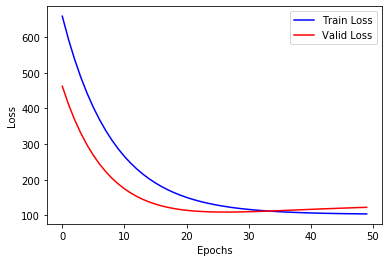

In [19]:

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train,'blue',label="Train Loss")
plt.plot(loss_list_valid,'red',label="Valid Loss")
plt.legend(loc=1)#通过参数loc指定图例位置

In [20]:
print("Test_loss:{:.4f}".format(loss(x_test, y_test, w, b).numpy()))
print(w)
print(b)

Test_loss:114.7964
<tf.Variable 'Variable:0' shape=(12, 1) dtype=float32, numpy=
array([[ 0.21496676],
       [ 0.15124302],
       [-0.26865703],
       [ 0.6767167 ],
       [-1.9421709 ],
       [ 1.2515285 ],
       [ 0.1135649 ],
       [-0.8295551 ],
       [ 0.5146159 ],
       [-0.6731716 ],
       [-2.7072697 ],
       [-1.301161  ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([24.259771], dtype=float32)>
